<h4>Coursera - IBM - Applied Data Science Capstone - Final Capstone Project (Week 2) </h4>


<h1>Ethnic food preferences in the most populated cities in the United States </h1>

<h2>Table of contents</h2>
1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Results](#results)
5. [Discussion](#discussion)
6. [Conclusion](#conclusion)

<h2>1. Introduction</h2><a name="introduction"></a>
<h3>Background:</h3>
The United States of America (USA) is known worldwide as one of the countries with the highest level of immigration, a fact that has allowed this country to have a wide variety of nationalities that greatly enriches its culture. One of the ways this can be reflected is in the great variety of ethnic cuisine that can be found in the USA, which is consumed by many American citizens - especially for the younger ones, who love to try new flavours and experiences.


<h3>Problem: </h3>
I want to answer the following questions: is there a difference in ethnic food preference among the most populated cities in the USA? And if so, what is it, and what could explain it? Also I want to know how the culinary preference is distributed among the cities and which of those have similar ones.


<h2>2. Data</h2><a name="data"></a>

This study takes the 30 most populated cities in the United States in order to keep the problem tractable and for it to be representative enough in terms of population. For this I used the list of the 317 most populated cities in the U.S. as estimated by the U.S. Census Bureau, which can be found on https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population.

To define ethnic food preferences, the 5 most populous international cuisines in all of the United States were established according to Technomic, which is cited in the report at https://blogs.voanews.com/all-about-america/2015/05/18/top-10-most-popular-ethnic-cuisines-in-us/. Among these foods are Asian, Mexican, Italian, Greek and French. 

Once I have the cities with their latitudes arranged in a dataframe, I will proceed to call Foursquare which will be used to search for each of these ethnic foods through the restaurant in each of the cities under study. With this information I will know what is the favorite ethnic food in each city, how these preferences are distributed among cities and which of them have similar preferences. 

Finally, you can see on the map the cities grouped according to their culinary tastes. 


<h2>3. Methodology</h2><a name="methodology"></a>

To solve our problem of how ethnic food preferences are distributed in the 30 most populated cities in the United States, the methodology followed was as follows:

1. Install and import all the libraries we need for the analysis.
2. Search for the most populated cities in the U.S. and find the coordinates of each one. For our luck on Wikipedia all this information was found in the same page in a table.
3. Scrape the Wikipedia page, using the "read_html" function of "pandas.io.htm", to get the table with the information of the cities. Then we use this table to make a functional and clear DataFrame with all the information we need. 
4.  Once the DataFrame was done, we proceeded to make a call to the Foursquare API to find the Asian, Mexican, Italian, Greek and French restaurants in each city. We defined a radius of 1.2 km which is the maximum radius we can choose to get relevant information, this is because the free Foursquare account only returns 50 venues and if we enlarge the radius we exceed this limit and see reflected only 50 for all cities. We also look for the identification of each type of restaurant at https://developer.foursquare.com/docs/build-with-foursquare/categories/, where Foursquare defines a category for each type of restaurant. In this way we made the search more efficient and specific to what we needed to obtain.
5. With the information obtained on Foursquare, we made a new DataFrame to sort the data of the amount of each type of restaurant for each of the cities.
6. After making the new DataFrame, we cluster the cities using the K-mean model. For this analysis we grouped the data by city and defined a k=4.
7. Finally, we made a map with Folium to visualize how the cities, that were previously grouped, are distributed in the U.S. 

<h3>3.1 Import Libraries</h3>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')


Libraries imported.


/Users/mpaz/Library/Python/2.7/lib/python/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


<h3>3.2 Scrape wikipedia page and create a DataFrame</h3>

In [2]:
from pandas.io.html import read_html
page= "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"

wikitables= read_html(page, index_col=0, attrs={"class":"wikitable"})
print("Extracted {num} wikitables".format(num=len(wikitables)))

Extracted 8 wikitables


In [3]:
df = wikitables[1]
df.head()
df.shape

(318, 10)

In [4]:
wikitables[1].head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
2019rank,City,State[c],2019estimate,2010Census,Change,2016 land area,2016 population density,Location,NaN,NaN
1,New York[d],New York,8336817,8175133,+1.98%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...
2,Los Angeles,California,3979576,3792621,+4.93%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...
3,Chicago,Illinois,2693976,2695598,−0.06%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...
4,Houston[3],Texas,2320268,2100263,+10.48%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...


In [5]:
# Cleaning DataFrame 

# Rename columns
df=df.rename(columns={0: "", 1: "City", 2: "State", 3: "Estimate population 2019", 4: "Population. Census 2010", 5: "Change", 6: "2016 land area sq mi", 7: "2016 land area km2", 8: "2016 population density sq mi", 9: "2016 population density km2", 10: "Location"})
df

#Remove unnecessary columns and rows
df_2= df.drop("2019rank", axis=0)
del df_2['Change']
del df_2["State"]
del df_2['2016 population density sq mi']
del df_2['2016 land area sq mi']
del df_2['Estimate population 2019']
del df_2["Population. Census 2010"]
del df_2["2016 land area km2"]

df_2.reset_index()
df_2.index.names = ["index"]

df_2.head()

,City,2016 population density km2,Location
index,,,
1,New York[d],"10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...
2,Los Angeles,"3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...
3,Chicago,"4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...
4,Houston[3],"1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...
5,Phoenix,"1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...


In [6]:
# See all the information in the "Location" cell
df_2[["Location"]].head()

#split the cell "Location"
Location= df_2.Location.str.split(expand=True,)
Location.head()

,0,1,2,3,4,5,6,7,8,9,10,11
index,,,,,,,,,,,,
1,40°39′49″N,73°56′19″W﻿,/,﻿40.6635°N,73.9387°W﻿,/,40.6635;,-73.9387﻿,(1,New,York,City)
2,34°01′10″N,118°24′39″W﻿,/,﻿34.0194°N,118.4108°W﻿,/,34.0194;,-118.4108﻿,(2,Los,Angeles),None
3,41°50′15″N,87°40′54″W﻿,/,﻿41.8376°N,87.6818°W﻿,/,41.8376;,-87.6818﻿,(3,Chicago),None,None
4,29°47′12″N,95°23′27″W﻿,/,﻿29.7866°N,95.3909°W﻿,/,29.7866;,-95.3909﻿,(4,Houston),None,None
5,33°34′20″N,112°05′24″W﻿,/,﻿33.5722°N,112.0901°W﻿,/,33.5722;,-112.0901﻿,(6,Phoenix),None,None


In [7]:
# Create new latitude and longitude cells from the "location" cell

Latitud= Location[[6]]
Latitud=Latitud.rename(columns={6: "Latitud"})
#print(Latitud)

Longitud= Location[[7]]
Longitud=Longitud.rename(columns={7: "Longitud"})
#print(Longitud)

In [8]:
# Add new Latitud and Longitud cells and remove Location cell

df_2["Latitud"]= Latitud["Latitud"]
df_2["Longitud"]= Longitud["Longitud"]
del df_2['Location']
df_2.head()

,City,2016 population density km2,Latitud,Longitud
index,,,,
1,New York[d],"10,933/km2",40.6635;,-73.9387﻿
2,Los Angeles,"3,276/km2",34.0194;,-118.4108﻿
3,Chicago,"4,600/km2",41.8376;,-87.6818﻿
4,Houston[3],"1,395/km2",29.7866;,-95.3909﻿
5,Phoenix,"1,200/km2",33.5722;,-112.0901﻿


In [9]:
# Remove unnecessary information from latitud and longitud cells

lat= range(30)
for i in lat:
    df_2['Latitud'][i] = df_2['Latitud'][i][0:-1]

    
lon= range(30)
for i in lon:
    df_2['Longitud'][i] = df_2['Longitud'][i][0:-1]


In [10]:
df_2.head()

,City,2016 population density km2,Latitud,Longitud
index,,,,
1,New York[d],"10,933/km2",40.6635,-73.9387
2,Los Angeles,"3,276/km2",34.0194,-118.4108
3,Chicago,"4,600/km2",41.8376,-87.6818
4,Houston[3],"1,395/km2",29.7866,-95.3909
5,Phoenix,"1,200/km2",33.5722,-112.0901


In [11]:
# The 30 most populated cities in the U.S.

df_final=df_2.head(30)

# clean up the name of the city, removing the parentheses.

for i in lon:
    city_name = df_final['City'][i]
    idx = city_name.find('[')
    if idx > 0:
        df_final['City'][i] = df_final['City'][i][:idx]
    else:
        df_final['City'][i]

df_final.head()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,City,2016 population density km2,Latitud,Longitud
index,,,,
1,New York,"10,933/km2",40.6635,-73.9387
2,Los Angeles,"3,276/km2",34.0194,-118.4108
3,Chicago,"4,600/km2",41.8376,-87.6818
4,Houston,"1,395/km2",29.7866,-95.3909
5,Phoenix,"1,200/km2",33.5722,-112.0901


<h3>3.3 Explore U.S. cities with Foursquare</h3>

<h4>3.3.1.Define Foursquare Credentials and Version</h4>

In [12]:
CLIENT_ID = 'EOYNR0NCUOCNB31ALVP4PYBR0GJ2CTPXVHFAOZMGC35NENTW' # Foursquare ID
CLIENT_SECRET = '5U2O415F5FFLWI2HUMYAJMIK1MAM1XWJKTN5SE0WAUP2BT2P' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EOYNR0NCUOCNB31ALVP4PYBR0GJ2CTPXVHFAOZMGC35NENTW
CLIENT_SECRET:5U2O415F5FFLWI2HUMYAJMIK1MAM1XWJKTN5SE0WAUP2BT2P


<h4>3.3.2 Get request and venue </h4>

In [13]:
#Search for restaurants through their Foursquare category. https://developer.foursquare.com/docs/build-with-foursquare/categories/

# asian restaurant category
'4bf58dd8d48988d142941735'

# mexican restaurant category
"4bf58dd8d48988d1c1941735"

# italian restaurant category
"4bf58dd8d48988d110941735"

# greek restaurant category
"4bf58dd8d48988d10e941735"

# french restaurant category
"4bf58dd8d48988d10c941735"

restaurant_type= ["asian", "mexican", "italian", "greek", "french"]
restaurant_ID= ['4bf58dd8d48988d142941735', "4bf58dd8d48988d1c1941735", "4bf58dd8d48988d110941735", "4bf58dd8d48988d10e941735", "4bf58dd8d48988d10c941735"]

LIMIT=100
radius = 1200


In [14]:
#create new empty columns in the df_final for restaurants 

df_final["Asian Restaurant"] = ""
df_final["Mexican Restaurant"] = ""
df_final["Italian Restaurant"] = ""
df_final["Greek Restaurant"] = ""
df_final["French Restaurant"] = ""

df_final.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,City,2016 population density km2,Latitud,Longitud,Asian Restaurant,Mexican Restaurant,Italian Restaurant,Greek Restaurant,French Restaurant
index,,,,,,,,,
1,New York,"10,933/km2",40.6635,-73.9387,,,,,
2,Los Angeles,"3,276/km2",34.0194,-118.4108,,,,,
3,Chicago,"4,600/km2",41.8376,-87.6818,,,,,
4,Houston,"1,395/km2",29.7866,-95.3909,,,,,
5,Phoenix,"1,200/km2",33.5722,-112.0901,,,,,


In [15]:
# Function to repeat the same process to all the cities

for i in range(30):
    city= df_final["City"][i]
    latitude = df_final['Latitud'][i]
    longitude = df_final['Longitud'][i]

    for j in range(5):
        restorantID= restaurant_ID[j]
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, restorantID, radius, LIMIT)
        
        results_restaurant= requests.get(url).json()
        venues= results_restaurant['response']['venues']
        df_restaurant= json_normalize(venues)
        df_restaurant.shape
        
        if j == 0:
            df_final["Asian Restaurant"][i] = df_restaurant.shape[0]
        elif j == 1:
            df_final["Mexican Restaurant"][i] = df_restaurant.shape[0]
        elif j == 2:
            df_final["Italian Restaurant"][i] = df_restaurant.shape[0]
        elif j == 3:
            df_final["Greek Restaurant"][i] = df_restaurant.shape[0]
        elif j == 4:
            df_final["French Restaurant"][i] = df_restaurant.shape[0]
            
            

In [16]:
#convert dtype 'object' to float and int 

df_final['Latitud'] = df_final['Latitud'].astype(str).astype(float)
df_final['Longitud'] = df_final['Longitud'].astype(str).astype(float)
df_final['Asian Restaurant'] = df_final['Asian Restaurant'].astype(str).astype(float).astype(int)
df_final['Mexican Restaurant'] = df_final['Mexican Restaurant'].astype(str).astype(float).astype(int)
df_final['Italian Restaurant'] = df_final['Italian Restaurant'].astype(str).astype(float).astype(int)
df_final['Greek Restaurant'] = df_final['Greek Restaurant'].astype(str).astype(float).astype(int)
df_final['French Restaurant'] = df_final['French Restaurant'].astype(str).astype(float).astype(int)


df_final.head(10)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,City,2016 population density km2,Latitud,Longitud,Asian Restaurant,Mexican Restaurant,Italian Restaurant,Greek Restaurant,French Restaurant
index,,,,,,,,,
1,New York,"10,933/km2",40.6635,-73.9387,48,3,3,0,0
2,Los Angeles,"3,276/km2",34.0194,-118.4108,47,27,8,2,3
3,Chicago,"4,600/km2",41.8376,-87.6818,5,31,5,0,0
4,Houston,"1,395/km2",29.7866,-95.3909,9,17,4,1,0
5,Phoenix,"1,200/km2",33.5722,-112.0901,6,11,0,0,0
6,Philadelphia,"4,511/km2",40.0094,-75.1333,20,6,0,0,0
7,San Antonio,"1,250/km2",29.4724,-98.5251,1,33,0,0,0
8,San Diego,"1,670/km2",32.8153,-117.1350,10,6,0,0,0
9,Dallas,"1,493/km2",32.7933,-96.7665,13,30,2,0,0


In [17]:
df_final["Favorite food"] = ""

for i in range(30):
    # Create numpy array with numbers of restaurants per type of restaurant. First item will have number of 
    # asian restaurants, second mexican, etc.
    nrestaurants = np.array([df_final["Asian Restaurant"][i], df_final["Mexican Restaurant"][i], \
                             df_final["Italian Restaurant"][i], df_final["Greek Restaurant"][i], \
                             df_final["French Restaurant"][i]])
    
    # Now, find the index at which you have the maximum.
    idx_max = np.where(nrestaurants == np.max(nrestaurants))[0]
    # Ommit cases on which two or more restaurants are equally popular:
    if len(idx_max) == 1 and np.sum(nrestaurants) != 0.:
        if idx_max[0] == 0:
            df_final["Favorite food"][i] = 'Asian'
        elif idx_max[0] == 1:
            df_final["Favorite food"][i] = 'Mexican'
        elif idx_max[0] == 2:
            df_final["Favorite food"][i] = 'Italian'
        elif idx_max[0] == 3:
            df_final["Favorite food"][i] = 'Greek'
        elif idx_max[0] == 4:
            df_final["Favorite food"][i] = 'French'

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCo

In [18]:
df_final.head()

,City,2016 population density km2,Latitud,Longitud,Asian Restaurant,Mexican Restaurant,Italian Restaurant,Greek Restaurant,French Restaurant,Favorite food
index,,,,,,,,,,
1,New York,"10,933/km2",40.6635,-73.9387,48,3,3,0,0,Asian
2,Los Angeles,"3,276/km2",34.0194,-118.4108,47,27,8,2,3,Asian
3,Chicago,"4,600/km2",41.8376,-87.6818,5,31,5,0,0,Mexican
4,Houston,"1,395/km2",29.7866,-95.3909,9,17,4,1,0,Mexican
5,Phoenix,"1,200/km2",33.5722,-112.0901,6,11,0,0,0,Mexican


In [19]:
# total preference

df_data= df_final[["City", "Asian Restaurant", "Mexican Restaurant", "Italian Restaurant", "Greek Restaurant", "French Restaurant"]]

data= [[df_data["Asian Restaurant"].sum(), df_data["Mexican Restaurant"].sum(), df_data["Italian Restaurant"].sum(), df_data["Greek Restaurant"].sum(), df_data["French Restaurant"].sum()]]

df_total= pd.DataFrame (data, columns = ["Total_asian", "Total_mexican", "Total_italian", "Total_greek", "Total_french"])

df_total



,Total_asian,Total_mexican,Total_italian,Total_greek,Total_french
0,453,381,111,30,41


<IPython.core.display.Javascript object>


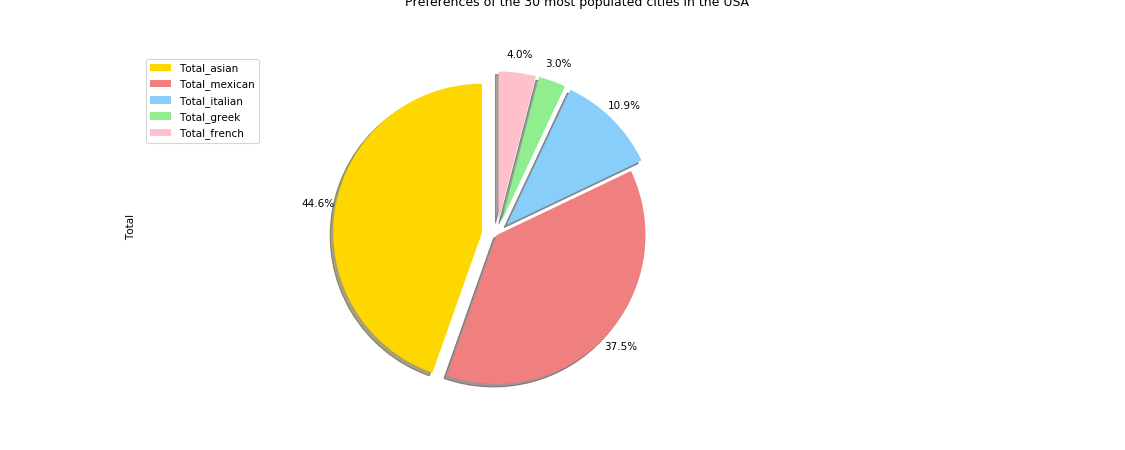

In [27]:
#transposed from df_final
df2= df_total.transpose().rename(columns={0: "Total"}) 


# made a pie chart

%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

colors_list = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df2['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Preferences of the 30 most populated cities in the USA', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df2.index, loc='upper left') 

plt.show()

In [21]:
df_final["Location"]=""

for i in range(30):
    longitud= df_final["Longitud"][i]
    if (longitud < -115):
        df_final["Location"][i]= "west coast"
    elif (longitud > -82):
        df_final["Location"][i]= "East coast"
    else:
        df_final["Location"][i]= "In the middle" 

df_final.head()



/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopy

,City,2016 population density km2,Latitud,Longitud,Asian Restaurant,Mexican Restaurant,Italian Restaurant,Greek Restaurant,French Restaurant,Favorite food,Location
index,,,,,,,,,,,
1,New York,"10,933/km2",40.6635,-73.9387,48,3,3,0,0,Asian,East coast
2,Los Angeles,"3,276/km2",34.0194,-118.4108,47,27,8,2,3,Asian,west coast
3,Chicago,"4,600/km2",41.8376,-87.6818,5,31,5,0,0,Mexican,In the middle
4,Houston,"1,395/km2",29.7866,-95.3909,9,17,4,1,0,Mexican,In the middle
5,Phoenix,"1,200/km2",33.5722,-112.0901,6,11,0,0,0,Mexican,In the middle


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


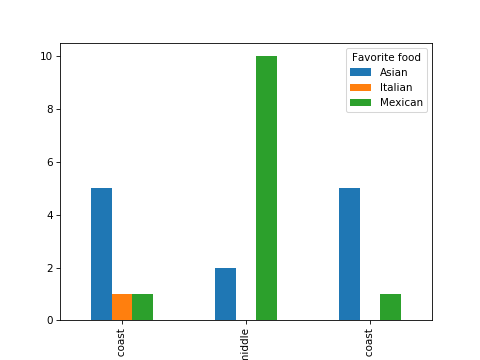

In [22]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

df_favorite=df_final[["Favorite food", "Location"]]


nan_value = float("NaN")
df_favorite.replace("", nan_value, inplace=True)
df_favorite.dropna(subset = ["Favorite food"], inplace=True)

df_favorite=df_favorite.groupby(["Location", "Favorite food"]).size()
df_favorite=df_favorite.unstack()
df_favorite.plot(kind="bar")



plt.show()


<h3>3.4 Cluster Cities </h3>


In [23]:
# Group by Cities

df_data.grouped = df_final.groupby('City').mean().reset_index()
df_data.grouped.head()

,City,Latitud,Longitud,Asian Restaurant,Mexican Restaurant,Italian Restaurant,Greek Restaurant,French Restaurant
0,Austin,30.3039,-97.7544,3,2,2,0,0
1,Baltimore,39.3000,-76.6105,43,11,6,2,7
2,Boston,42.3320,-71.0202,3,1,5,0,0
3,Charlotte,35.2078,-80.8310,14,5,4,5,3
4,Chicago,41.8376,-87.6818,5,31,5,0,0


In [24]:
# cluster city

# set number of clusters
kclusters = 4

df_data.grouped_clustering = df_data.grouped.drop('City', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_data.grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



array([1, 2, 1, 1, 1, 1, 1, 3, 1, 3], dtype=int32)

In [25]:
# includes the cluster in df_data.grouped DataFrame

df_data.grouped.insert(0, 'Cluster Labels', kmeans.labels_)
df_data.grouped.head()

,Cluster Labels,City,Latitud,Longitud,Asian Restaurant,Mexican Restaurant,Italian Restaurant,Greek Restaurant,French Restaurant
0,1,Austin,30.3039,-97.7544,3,2,2,0,0
1,2,Baltimore,39.3000,-76.6105,43,11,6,2,7
2,1,Boston,42.3320,-71.0202,3,1,5,0,0
3,1,Charlotte,35.2078,-80.8310,14,5,4,5,3
4,1,Chicago,41.8376,-87.6818,5,31,5,0,0


<h3>3.5 Create map and visualize the resulting clusters</h3>

In [26]:
# create map
map_clusters = folium.Map(location=[np.median(df_final['Latitud']), np.median(df_final['Longitud'])], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data.grouped['Latitud'], df_data.grouped['Longitud'], df_data.grouped['City'], df_data.grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>4. Results</h2><a name="results"></a>

The results obtained show that the most consumed food in the 30 most populated cities in the U.S. are those included in the Asian category, followed by Mexican food.
It is important to note that within the Asian category you can find Chinese, Japanese, Korean, and Filipino food among others.

The other result, obtained by grouping the cities with the K-mean model and visualizing them through the map, shows that the cities that are grouped in the same group have very similar culinary tastes and are located in very similar geographical areas.

Finally, from this analysis it could also be obtained that cities on the eastern and western coasts have a preference for Asian food, while cities in the central United States prefer Mexican food.

<h2>5. Discussion</h2><a name="discussion"></a> 

An important point to discuss is the coordinates that are assigned to the cities, because these are not located in a place that represents the city. in the case of this study the city of san francisco did not obtain information because the coordinates are in the sea, where the possibility of finding a restaurant is null. 

Another point to highlight is the small search radius that had to be defined (1.2 km). We consider this to be unrepresentative of how big all these cities are. Besides, we have to add that this search area is not necessarily in a sector that represents the city, because as we mentioned before, it is around the coordinates that can be located in any part of the city. 

With regard to the findings that cities on the east and west coasts have a preference for Asian foods, it may be that these areas are home to the largest Asian population.

Finally, it is important to note that within Asian food there are many subcategories, such as Chinese, Japanese, Korean and others. This makes it a much more varied and larger group compared to the other types of food under study.


<h2>6. Conclusion </h2><a name="conclusion"></a> 

Despite the reduced number of venues provided by the free "Foursquare" account, it was possible to obtain answers to the problem in question.

However, for future studies it would be good to do the same analysis but with a premium "Foursquare" account. This will allow you to get more than 50 venues in response to each call made. With this access you will be able to define a larger search radius that will allow you to better represent each city in the study.